# I add a loop to the Twitter API in the python-twitter library to avoid the maximum 100 limit for UserTimeline search

# I also add custom wordcloud and cleaned text dataframe options

In [1]:
!pip install python-twitter

In [2]:
import twitter
import json
import pandas as pd
import numpy as np

# Save twiiter api credentials from developer acc

In [3]:
import keys

# Adding tweet_mode = 'extended' is how you avoid trancated text.

In [4]:
api = twitter.Api(consumer_key=keys.consumer_key,
  consumer_secret=keys.consumer_secret,
  access_token_key=keys.access_token,
  access_token_secret=keys.access_token_secret,
  cache=None,
  tweet_mode=  'extended')

# No retweets, no replies, Not sure if trim_user makes a difference-set to false prior to discovering tweet_mode/extended

ID from this gets the last tweetid to set maxid for loop

In [5]:
# need to get first tweet id
opp1 = api.GetUserTimeline(screen_name='@realDonaldTrump', count=1,include_rts=False, trim_user=False, exclude_replies=True)
opp1

[Status(ID=1248333612212195328, ScreenName=realDonaldTrump, Created=Thu Apr 09 19:35:00 +0000 2020, Text='The Wall Street Journal always “forgets” to mention that the ratings for the White House Press Briefings are “through the roof” (Monday Night Football, Bachelor Finale, according to @nytimes) &amp; is only way for me to escape the Fake News &amp; get my views across. WSJ is Fake News!')]

# Set maxid = to ID then max_id=maxid

For what I am doing, it may also make sense to include entities because when I clean the text, it removes the hashtags from the full_text. Can use tableau to split

text is now full_text





1.   I imagine this could be a lot cleaner, but I pretty much blunt forced this until I could get a loop to run for the tweet pull
2.   ell[i] will give a json object for


In [6]:
maxid=1248333612212195328
ell=[] #ell[i] will give a json object for an individual tweet after run
for opp in range(0,50): # 30 seems arbitrary. 25 and 50 gave same results
    opp = api.GetUserTimeline(screen_name='@realDonaldTrump', count=100,max_id=maxid, include_rts=False, trim_user=False, exclude_replies=True)
    ilistnew = list(opp)
    for tweet in ilistnew:
        ell.append(json.loads(json.dumps(tweet._json)))
        maxid = ell[len(ell)-1].get("id") # I didn't know how to end this, which is why I set range
date = []
ids = []
text = []
favorite = []
retweet = []
entities = []
ex_entities=[]
for line in ell:
    date.append(line['created_at'])
    ids.append(line['id'])
    text.append(line['full_text'])
    favorite.append(line['favorite_count'])
    retweet.append(line['retweet_count'])
    entities.append(line['entities'])

newdf = pd.DataFrame(list(zip(date, ids,text,favorite,retweet,entities)), columns=['date', 'tweet_id','full_text','favorited','retweeted','entities'])
newdf['length'] = newdf.apply(lambda row: len(row.full_text), axis=1)
#newdf = newdf.drop_duplicates() # to keep entities-need to drop dups manually. if don't want entities, can remove and unhash
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 7 columns):
date         1273 non-null object
tweet_id     1273 non-null int64
full_text    1273 non-null object
favorited    1273 non-null int64
retweeted    1273 non-null int64
entities     1273 non-null object
length       1273 non-null int64
dtypes: int64(4), object(3)
memory usage: 69.7+ KB


# Normally returns ~1300 tweets- to 12/19/19

In [7]:
newdf.tail()

date             tweet_id  \
1268  Fri Dec 27 14:16:44 +0000 2019  1210565179949404160   
1269  Fri Dec 27 13:48:31 +0000 2019  1210558076815912960   
1270  Fri Dec 27 04:27:44 +0000 2019  1210416954068078592   
1271  Fri Dec 27 04:20:25 +0000 2019  1210415111925649408   
1272  Fri Dec 27 00:17:42 +0000 2019  1210354030997901312   

                                              full_text  favorited  retweeted  \
1268  Thank you Kristy, have a great year! https://t...      74326      13539   
1269  Academy Award winning actor (and great guy!) @...      75076      16569   
1270  “Democrats repeatedly claimed impeachment was ...      85016      20093   
1271  “Pelosi’s stall tactics expose the weakness of...      73197      16206   
1272         Thank you Ritchie! https://t.co/1TnVNXRCdn      48814      11689   

                                               entities  length  
1268  {'hashtags': [], 'symbols': [], 'user_mentions...      60  
1269  {'hashtags': [], 'symbols': [], 'user_mentions...     283  
1270  {'hashtags': [], 'symbols': [], 'user_mentions...     209  
1271  {'hashtags': [], 'symbols': [], 'user_mentions...      99  
1272  {'hashtags': [], 'symbols': [], 'user_mentions...      42

# Export to CSV or Excel

In [8]:
newdf.to_excel('tweeters.xlsx',header=True)

# If want to clean the full_text column to remove links/non varchar

This removes many full tweets for this user-this is where having the entities can supplement the meaning of the hashtags and mentions removed

In [9]:
!pip install tweet-preprocessor

  Using cached tweet-preprocessor-0.5.0.tar.gz (6.3 kB)


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\sixer\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sixer\\AppData\\Local\\Temp\\pip-install-uddla2jr\\tweet-preprocessor\\setup.py'"'"'; __file__='"'"'C:\\Users\\sixer\\AppData\\Local\\Temp\\pip-install-uddla2jr\\tweet-preprocessor\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\sixer\AppData\Local\Temp\pip-install-uddla2jr\tweet-preprocessor\pip-egg-info'
         cwd: C:\Users\sixer\AppData\Local\Temp\pip-install-uddla2jr\tweet-preprocessor\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\sixer\AppData\Local\Temp\pip-install-uddla2jr\tweet-preprocessor\setup.py", line 6, in <module>
        long_description = f.read()
      Fil

In [10]:
!pip install nltk

In [11]:
import nltk
import re
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import preprocessor as p

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sixer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def fix_Text(text):
    stop_words = set(stopwords.words("english"))
    custom = ['amp','https','kag','co']
    custom_list = stop_words.union(custom)
    letters = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters.lower().split()
    goodwords=[word for word in words if word not in custom_list]
    return(" ".join(goodwords))

In [13]:
clean = newdf.full_text.apply(fix_Text)
clean.isnull().sum()

0

In [14]:
newdf['clean_text'] = clean
newdf.isnull().values.any()

False

In [15]:
!pip install wordcloud

In [16]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from os import path
from PIL import Image

# Custom Wordcloud frrom stenciled image

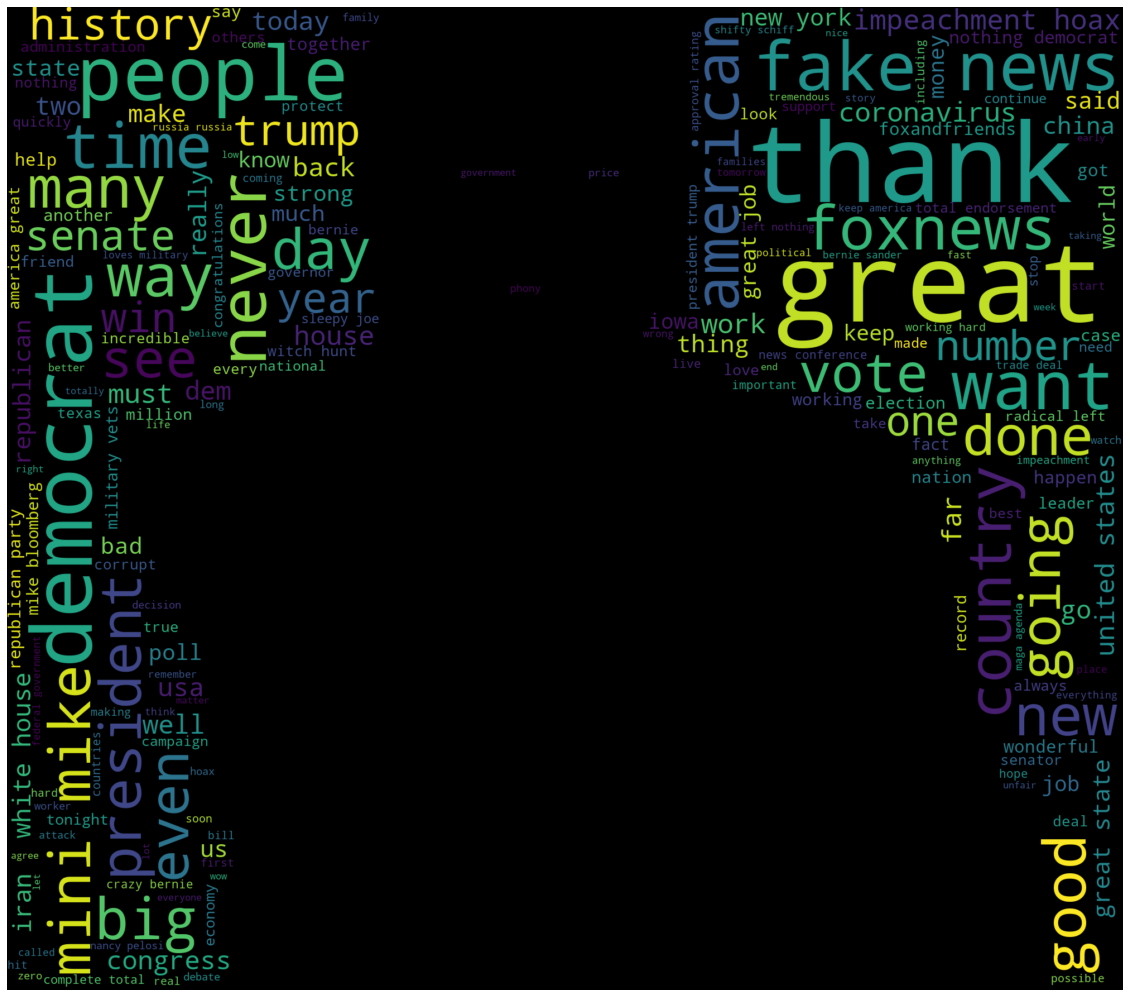

In [17]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
trump_mask = np.array(Image.open(path.join(d, "trumpcloud.png")))
wc = " ".join(item for item in clean)
wordcloud = WordCloud(background_color="black",mask=trump_mask).generate(wc)
plt.figure(figsize = (20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Create Dataframe with cleaned tweet column

In [18]:
df_clean = pd.DataFrame(list(zip(date, ids,text,clean,favorite,retweet)), columns=['date', 'tweet_id','full_text','clean','favorited','retweeted'])

# Finally Export Dataframe with clean text to CSV

In [19]:
df_clean.to_csv('clean_tweeters.csv',header=True)